In [178]:
import numpy as np
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
import warnings
import shap
import os

from datetime import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc

import xgboost as xgb

from pdpbox import pdp, info_plots
from pdpbox import pdp, info_plots

sns.set()

In [218]:
air_auber = pd.read_csv('qualite-de-lair-mesuree-dans-la-station-auber.csv', sep=';')
air_chatelet = pd.read_csv('qualite-de-lair-mesuree-dans-la-station-chatelet.csv', sep=';')
air_frkl = pd.read_csv('qualite-de-lair-mesuree-dans-la-station-franklin-d-roosevelt.csv', sep=';')

## Auber

In [219]:
air_auber

,DATE/HEURE,NO,NO2,PM10,PM2.5,CO2,TEMP,HUMI
0,2021-08-02T02:00:00+02:00,ND,ND,ND,ND,ND,ND,ND
1,2021-08-02T01:00:00+02:00,ND,ND,ND,ND,ND,ND,ND
2,2021-08-02T00:00:00+02:00,ND,ND,ND,ND,ND,ND,ND
3,2021-08-01T23:00:00+02:00,ND,ND,ND,ND,ND,ND,ND
4,2021-08-01T22:00:00+02:00,ND,ND,ND,ND,ND,ND,ND
...,...,...,...,...,...,...,...,...
74125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [220]:
air_auber.isna().sum()

DATE/HEURE    8736
NO            8736
NO2           8736
PM10          8736
PM2.5         8736
CO2           8736
TEMP          8736
HUMI          8736
dtype: int64

In [221]:
air_auber.drop(air_auber.tail(8736).index,inplace=True)

In [222]:
air_auber.drop(air_auber.head(21596).index,inplace=True)

In [223]:
air_auber

,DATE/HEURE,NO,NO2,PM10,PM2.5,CO2,TEMP,HUMI
21596,2018-01-01T00:00:00+01:00,6,27,207,80,ND,"17,8","47,8"
21597,2017-12-31T23:00:00+01:00,6,26,210,82,ND,"17,9","48,4"
21598,2017-12-31T22:00:00+01:00,7,28,203,83,ND,18,"49,9"
21599,2017-12-31T21:00:00+01:00,7,26,264,102,ND,18,"52,3"
21600,2017-12-31T20:00:00+01:00,7,28,239,91,ND,18,"53,8"
...,...,...,...,...,...,...,...,...
65389,2013-01-01T06:00:00+01:00,ND,ND,133,48,398,"20,1","50,2"
65390,2013-01-01T05:00:00+01:00,ND,ND,134,52,405,"20,2","50,5"
65391,2013-01-01T04:00:00+01:00,ND,ND,157,62,425,"20,1","50,4"
65392,2013-01-01T03:00:00+01:00,ND,ND,141,55,434,"20,3","50,4"


In [224]:
dict1={}

for i in air_auber:
    a=0
    for j in air_auber[i]:
        if j == 'ND':
            a=a+1
    dict1[i]=a
    
dict1
            

{'DATE/HEURE': 0,
 'NO': 3512,
 'NO2': 3261,
 'PM10': 1023,
 'PM2.5': 1811,
 'CO2': 3211,
 'TEMP': 96,
 'HUMI': 85}

In [225]:
dict1={}

for i in air_auber:
    a=0
    for j in air_auber[i]:
        if j == '<5':
            a=a+1
    dict1[i]=a
    
dict1

{'DATE/HEURE': 0,
 'NO': 0,
 'NO2': 0,
 'PM10': 315,
 'PM2.5': 710,
 'CO2': 0,
 'TEMP': 0,
 'HUMI': 0}

In [226]:
dict1={}

for i in air_auber:
    a=0
    for j in air_auber[i]:
        if j == '<2':
            a=a+1
    dict1[i]=a
    
dict1

{'DATE/HEURE': 0,
 'NO': 635,
 'NO2': 0,
 'PM10': 0,
 'PM2.5': 0,
 'CO2': 0,
 'TEMP': 0,
 'HUMI': 0}

In [227]:
air_auber=air_auber.drop(air_auber[air_auber['NO'] == 'ND'].index)
air_auber=air_auber.drop(air_auber[air_auber['NO2'] == 'ND'].index)
air_auber=air_auber.drop(air_auber[air_auber['PM10'] == 'ND'].index)
air_auber=air_auber.drop(air_auber[air_auber['PM2.5'] == 'ND'].index)
air_auber=air_auber.drop(air_auber[air_auber['CO2'] == 'ND'].index)
air_auber=air_auber.drop(air_auber[air_auber['TEMP'] == 'ND'].index)
air_auber=air_auber.drop(air_auber[air_auber['HUMI'] == 'ND'].index)

air_auber['NO'].mask(air_auber['NO'] == '<2', 2 , inplace=True)
air_auber['PM10'].mask(air_auber['PM10'] == '<5', 5 , inplace=True)
air_auber['PM2.5'].mask(air_auber['PM2.5'] == '<5', 5 , inplace=True)


In [228]:
air_auber = air_auber.apply(lambda x: x.str.replace(',','.'))

In [229]:
air_auber['NO']=pd.to_numeric(air_auber['NO'])
air_auber['NO2']=pd.to_numeric(air_auber['NO2'])
air_auber['PM10']=pd.to_numeric(air_auber['PM10'])
air_auber['PM2.5']=pd.to_numeric(air_auber['PM2.5'])
air_auber['CO2']=pd.to_numeric(air_auber['CO2'])
air_auber['TEMP']=pd.to_numeric(air_auber['TEMP'])
air_auber['HUMI']=pd.to_numeric(air_auber['HUMI'])

In [230]:
dscrb_auber=air_auber.describe(include='all')
dscrb_auber

,DATE/HEURE,NO,NO2,PM10,PM2.5,CO2,TEMP,HUMI
count,35911,35413.000000,35911.000000,35713.000000,35439.000000,35911.000000,35911.000000,35911.000000
unique,35911,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-03-07T11:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,59.861633,54.305951,141.868843,62.098536,530.711927,21.496798,43.610184
std,NaN,72.893904,22.974001,115.590880,49.091169,105.716333,3.745151,7.162767
min,NaN,2.000000,8.000000,5.000000,5.000000,390.000000,10.500000,21.000000
25%,NaN,18.000000,41.000000,69.000000,31.000000,447.000000,18.400000,38.600000
50%,NaN,42.000000,52.000000,111.000000,49.000000,509.000000,21.500000,43.500000
75%,NaN,77.000000,64.000000,179.000000,78.000000,585.000000,24.500000,48.600000


In [231]:
air_auber

,DATE/HEURE,NO,NO2,PM10,PM2.5,CO2,TEMP,HUMI
22003,2017-12-15T01:00:00+01:00,13.0,34,239.0,61.0,407,16.5,44.7
22004,2017-12-15T00:00:00+01:00,12.0,36,189.0,61.0,448,16.6,45.5
22005,2017-12-14T23:00:00+01:00,12.0,33,189.0,75.0,441,16.7,46.2
22006,2017-12-14T22:00:00+01:00,27.0,40,186.0,95.0,466,16.7,46.2
22007,2017-12-14T21:00:00+01:00,42.0,53,130.0,47.0,538,16.6,44.9
...,...,...,...,...,...,...,...,...
65302,2013-01-04T21:00:00+01:00,92.0,42,584.0,244.0,646,21.7,50.6
65303,2013-01-04T20:00:00+01:00,102.0,41,692.0,286.0,757,22.1,50.9
65304,2013-01-04T19:00:00+01:00,126.0,48,392.0,141.0,830,22.0,50.3
65305,2013-01-04T18:00:00+01:00,113.0,49,388.0,154.0,759,21.6,50.3


In [232]:
air_auber.isna().sum()

DATE/HEURE      0
NO            498
NO2             0
PM10          198
PM2.5         472
CO2             0
TEMP            0
HUMI            0
dtype: int64

In [233]:
values_auber={'NO':dscrb_auber['NO']['mean'],'PM10':dscrb_auber['PM10']['mean'],'PM2.5':dscrb_auber['PM2.5']['mean']}

In [234]:
air_auber = air_auber.fillna(value=values_auber)

In [235]:
air_auber['DATE/HEURE']=air_auber['DATE/HEURE'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S+%I:00'))

In [236]:
air_auber

,DATE/HEURE,NO,NO2,PM10,PM2.5,CO2,TEMP,HUMI
22003,2017-12-15 01:00:00,13.0,34,239.0,61.0,407,16.5,44.7
22004,2017-12-15 01:00:00,12.0,36,189.0,61.0,448,16.6,45.5
22005,2017-12-14 01:00:00,12.0,33,189.0,75.0,441,16.7,46.2
22006,2017-12-14 01:00:00,27.0,40,186.0,95.0,466,16.7,46.2
22007,2017-12-14 01:00:00,42.0,53,130.0,47.0,538,16.6,44.9
...,...,...,...,...,...,...,...,...
65302,2013-01-04 01:00:00,92.0,42,584.0,244.0,646,21.7,50.6
65303,2013-01-04 01:00:00,102.0,41,692.0,286.0,757,22.1,50.9
65304,2013-01-04 01:00:00,126.0,48,392.0,141.0,830,22.0,50.3
65305,2013-01-04 01:00:00,113.0,49,388.0,154.0,759,21.6,50.3


In [308]:
air_auber.describe(include='all')

,DATE/HEURE,NO,NO2,PM10,PM2.5,CO2,TEMP,HUMI
count,35911,35911.000000,35911.000000,35911.000000,35911.000000,35911.000000,35911.000000,35911.000000
unique,1631,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-03-29 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2013-01-04 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2017-12-15 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,59.861633,54.305951,141.868843,62.098536,530.711927,21.496798,43.610184
std,NaN,72.386692,22.974001,115.271768,48.767475,105.716333,3.745151,7.162767
min,NaN,2.000000,8.000000,5.000000,5.000000,390.000000,10.500000,21.000000
25%,NaN,19.000000,41.000000,70.000000,31.000000,447.000000,18.400000,38.600000


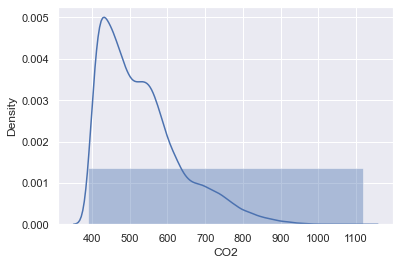

In [237]:
sns.distplot(air_auber['CO2'],bins=1)
plt.show()

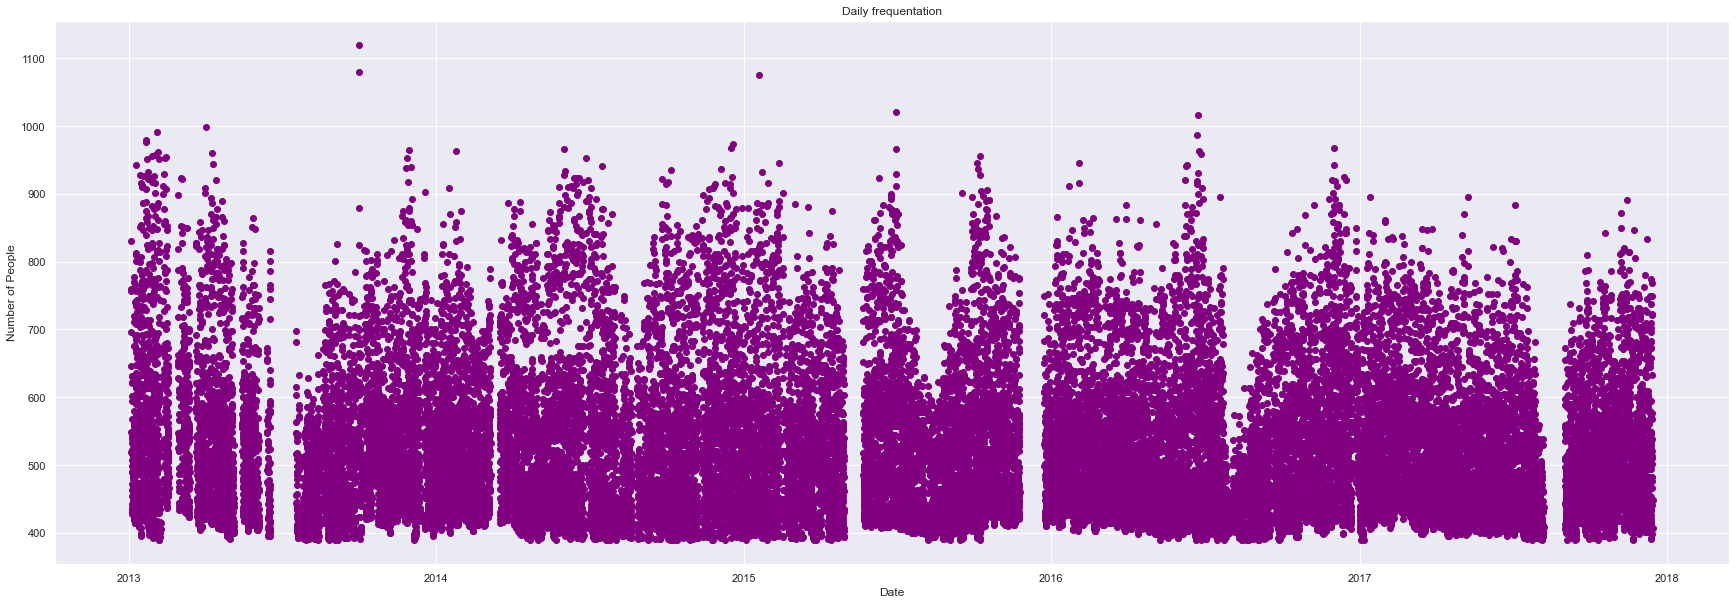

In [238]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(30, 10))

# Add x-axis and y-axis
ax.scatter(air_auber['DATE/HEURE'],
           air_auber['CO2'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Number of People",
       title="Daily frequentation")

plt.show()

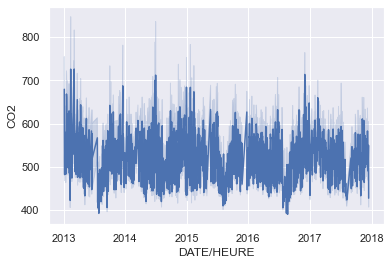

In [239]:
sns.lineplot(air_auber['DATE/HEURE'],air_auber['CO2'])
plt.show()

In [307]:
def compute_metrics(model, x_test=None, y_test=None, verbose=True):
    """
    Computes 3 accuracy metrics.
    model : Model to compute metrics with.
    x_test : Custom test set.
    y_test : Custom ground truth values.
    """
    if x_test is None and y_test is None:
        x_test = X_test
        y_test = Y_test
    Y_pred = model.predict(x_test)
    #fpr, tpr, _ = roc_curve(y_test.values, model.predict_proba(x_test)[:,1])
    dict_out = {
        'Max Error':max_error(y_test, Y_pred),
        'Mean Squared Error':mean_squared_error(y_test, y_pred, squared=False),
        'R2':r2_score(y_test, y_pred)
    }
    if verbose:
        print("Metrics :", dict_out)
    return dict_out


In [241]:
def grid_tuning(instance, grid):
    cv = GridSearchCV(instance, grid, n_jobs=1, refit=True, scoring='roc_auc',
                   verbose=0, cv=5, return_train_score=True)
    cv.fit(X_train, Y_train)
    print("Best parameters :", cv.best_params_)
    return cv


Text(0.5, 1.0, 'Correlation Heatmap')

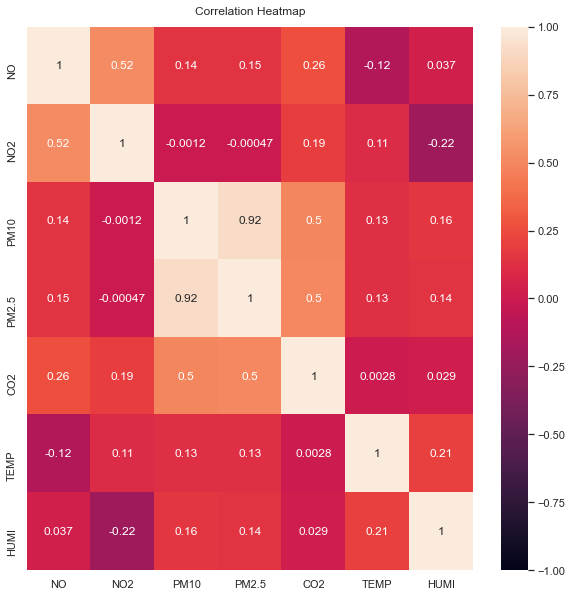

In [243]:
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(air_auber.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)


In [244]:
val = ['DATE/HEURE', 'NO', 'NO2', 'PM10', 'TEMP', 'HUMI']

In [245]:
def preprocess(dataset):
    X = pd.DataFrame()

    X = dataset[val]
    
    Y = dataset['CO2']

    # Label encoding for categorical variables
    label_encoder = LabelEncoder()

    X['DATE/HEURE'] = label_encoder.fit_transform(dataset['DATE/HEURE'])


    return X, Y

In [246]:
processed_dataset = preprocess(air_auber)
X_train, X_test, Y_train, Y_test = train_test_split(*processed_dataset, test_size=0.3, shuffle=True)

In [305]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV

In [29]:
gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)

grid_result = gsc.fit(X_train, Y_train)
best_params = grid_result.best_params_
rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],                               random_state=False, verbose=False)
scores = cross_val_score(rfr, X_train, Y_train, cv=10, scoring='neg_mean_absolute_error')
rfr.fit(X_train, Y_train)
scores

In [37]:
cv = grid_tuning(xgb.XGBClassifier(),
            { 'max_depth': range(3,7) , 'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [10, 50, 100, 1000] })
#optim_param = dict({'silent':1, 'objective':'binary:logistic', 'iter': 100 }, **cv.best_params_)
booster = xgb.XGBRegressor( **cv.best_params_)
booster.fit(X_train, Y_train)
models['Extreme Gradient Boosting'] = compute_metrics(booster)
del cv

[18:15:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:20:01] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:24:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror'

[22:07:02] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:03:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:09:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror'

[13:42:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:45:38] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:48:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror'

AttributeError: 'XGBRegressor' object has no attribute 'predict_proba'

In [247]:
shap.initjs()
model = xgb.XGBRegressor()
model.fit(X_train, Y_train)
booster = model.get_booster()
model2 = booster.save_raw()[4:]
booster.save_raw = lambda: model2
explainer = shap.TreeExplainer(booster)
shap_values = explainer.shap_values(X_test, approximate=True)
index = 500
shap.force_plot(explainer.expected_value, shap_values[index,:], X_test.iloc[index,:])

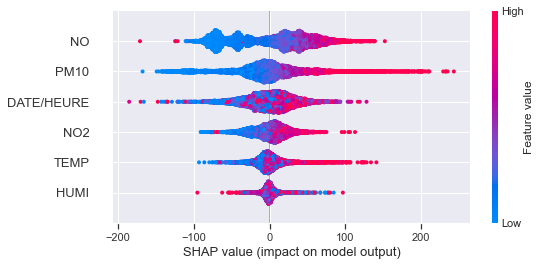

In [248]:
shap.summary_plot(shap_values, X_test)

## Chatelet

In [249]:
air_chatelet

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI
0,2021-08-02T02:00:00+02:00,3,9,48,443,"21,6","52,4"
1,2021-08-02T01:00:00+02:00,3,8,54,453,"21,8","51,8"
2,2021-08-02T00:00:00+02:00,3,9,80,473,"22,1",52
3,2021-08-01T23:00:00+02:00,4,10,96,494,"22,3","48,8"
4,2021-08-01T22:00:00+02:00,3,9,111,540,"22,6","45,8"
...,...,...,...,...,...,...,...
75017,2013-01-01T06:00:00+01:00,4,26,102,622,"21,2","45,9"
75018,2013-01-01T05:00:00+01:00,3,25,85,715,"21,6","45,8"
75019,2013-01-01T04:00:00+01:00,4,27,124,799,"21,8",47
75020,2013-01-01T03:00:00+01:00,6,30,166,800,"21,6","47,3"


In [250]:
air_chatelet.dtypes

DATE/HEURE    object
NO            object
NO2           object
PM10          object
CO2           object
TEMP          object
HUMI          object
dtype: object

In [251]:
air_chatelet = air_chatelet.apply(lambda x: x.str.replace(',','.'))

In [257]:
dict1={}

for i in air_chatelet:
    a=0
    for j in air_chatelet[i]:
        if j == 'ND':
            a=a+1
    dict1[i]=a
    
dict1
            

{'DATE/HEURE': 0,
 'NO': 5234,
 'NO2': 4600,
 'PM10': 2225,
 'CO2': 2777,
 'TEMP': 22,
 'HUMI': 32}

In [258]:
dict1={}

for i in air_chatelet:
    a=0
    for j in air_chatelet[i]:
        if j == '<2':
            a=a+1
    dict1[i]=a
    
dict1
       

{'DATE/HEURE': 0,
 'NO': 1658,
 'NO2': 0,
 'PM10': 0,
 'CO2': 0,
 'TEMP': 0,
 'HUMI': 0}

In [259]:
dict1={}

for i in air_chatelet:
    a=0
    for j in air_chatelet[i]:
        if j == '<5':
            a=a+1
    dict1[i]=a
    
dict1
            

{'DATE/HEURE': 0,
 'NO': 0,
 'NO2': 0,
 'PM10': 231,
 'CO2': 0,
 'TEMP': 0,
 'HUMI': 0}

In [260]:
dict1={}

for i in air_chatelet:
    a=0
    for j in air_chatelet[i]:
        if j == '>1000':
            a=a+1
    dict1[i]=a
    
dict1
       

{'DATE/HEURE': 0,
 'NO': 0,
 'NO2': 0,
 'PM10': 31,
 'CO2': 0,
 'TEMP': 0,
 'HUMI': 0}

In [263]:
air_chatelet=air_chatelet.drop(air_chatelet[air_chatelet['NO'] == 'ND'].index)
air_chatelet=air_chatelet.drop(air_chatelet[air_chatelet['NO2'] == 'ND'].index)
air_chatelet=air_chatelet.drop(air_chatelet[air_chatelet['PM10'] == 'ND'].index)
air_chatelet=air_chatelet.drop(air_chatelet[air_chatelet['CO2'] == 'ND'].index)
air_chatelet=air_chatelet.drop(air_chatelet[air_chatelet['TEMP'] == 'ND'].index)
air_chatelet=air_chatelet.drop(air_chatelet[air_chatelet['HUMI'] == 'ND'].index)

air_chatelet['NO'].mask(air_chatelet['NO'] == '<2', 2 , inplace=True)
air_chatelet['PM10'].mask(air_chatelet['PM10'] == '<5', 5 , inplace=True)
air_chatelet['PM10'].mask(air_chatelet['PM10'] == '>1000', 1000 , inplace=True)

In [264]:
air_chatelet.isna().sum()

DATE/HEURE        0
NO            21329
NO2           13391
PM10          12617
CO2           12304
TEMP          10496
HUMI          10485
dtype: int64

In [265]:
dscrb_chatelet=air_chatelet.describe(include='all')
dscrb_chatelet

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI
count,68842,47513,55451,56225,56538,58346,58357
unique,68842,342,137,775,739,225,710
top,2017-01-15T17:00:00+01:00,3,29,80,436,20.3,42.1
freq,1,2957,1632,366,253,721,349


In [266]:
air_chatelet['NO']=pd.to_numeric(air_chatelet['NO'])
air_chatelet['NO2']=pd.to_numeric(air_chatelet['NO2'])
air_chatelet['PM10']=pd.to_numeric(air_chatelet['PM10'])
air_chatelet['CO2']=pd.to_numeric(air_chatelet['CO2'])
air_chatelet['TEMP']=pd.to_numeric(air_chatelet['TEMP'])
air_chatelet['HUMI']=pd.to_numeric(air_chatelet['HUMI'])

In [267]:
dscrb_chatelet=air_chatelet.describe(include='all')
dscrb_chatelet

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI
count,68842,47513.000000,55451.000000,56225.000000,56538.000000,58346.000000,58357.000000
unique,68842,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-01-15T17:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,24.824238,35.362212,128.442081,578.034614,21.507925,44.689492
std,NaN,35.672144,14.811854,93.930596,132.380212,3.740833,9.136850
min,NaN,2.000000,4.000000,5.000000,383.000000,9.300000,20.200000
25%,NaN,5.000000,25.000000,69.000000,469.000000,19.000000,38.500000
50%,NaN,12.000000,34.000000,113.000000,554.000000,21.400000,43.800000
75%,NaN,30.000000,44.000000,170.000000,657.000000,24.300000,49.900000


In [269]:
values_chatelet={'NO':dscrb_chatelet['NO']['mean'],
                'NO2':dscrb_chatelet['NO2']['mean'],
                'PM10':dscrb_chatelet['PM10']['mean'],
                'CO2':dscrb_chatelet['CO2']['mean'],
                'TEMP':dscrb_chatelet['TEMP']['mean'],
                'HUMI':dscrb_chatelet['HUMI']['mean']}

In [270]:
air_chatelet = air_chatelet.fillna(value=values_chatelet)

In [271]:
air_chatelet.isna().sum()

DATE/HEURE    0
NO            0
NO2           0
PM10          0
CO2           0
TEMP          0
HUMI          0
dtype: int64

In [272]:
air_chatelet['DATE/HEURE']=air_chatelet['DATE/HEURE'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S+%I:00'))

In [273]:
air_chatelet

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI
0,2021-08-02 02:00:00,3.0,9.0,48.0,443.0,21.6,52.4
1,2021-08-02 02:00:00,3.0,8.0,54.0,453.0,21.8,51.8
2,2021-08-02 02:00:00,3.0,9.0,80.0,473.0,22.1,52.0
3,2021-08-01 02:00:00,4.0,10.0,96.0,494.0,22.3,48.8
4,2021-08-01 02:00:00,3.0,9.0,111.0,540.0,22.6,45.8
...,...,...,...,...,...,...,...
75017,2013-01-01 01:00:00,4.0,26.0,102.0,622.0,21.2,45.9
75018,2013-01-01 01:00:00,3.0,25.0,85.0,715.0,21.6,45.8
75019,2013-01-01 01:00:00,4.0,27.0,124.0,799.0,21.8,47.0
75020,2013-01-01 01:00:00,6.0,30.0,166.0,800.0,21.6,47.3


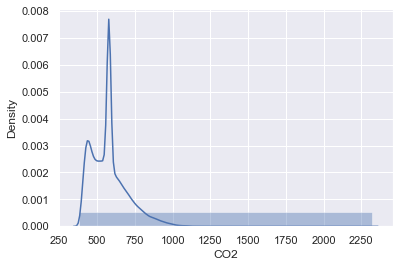

In [274]:
sns.distplot(air_chatelet['CO2'],bins=1)
plt.show()

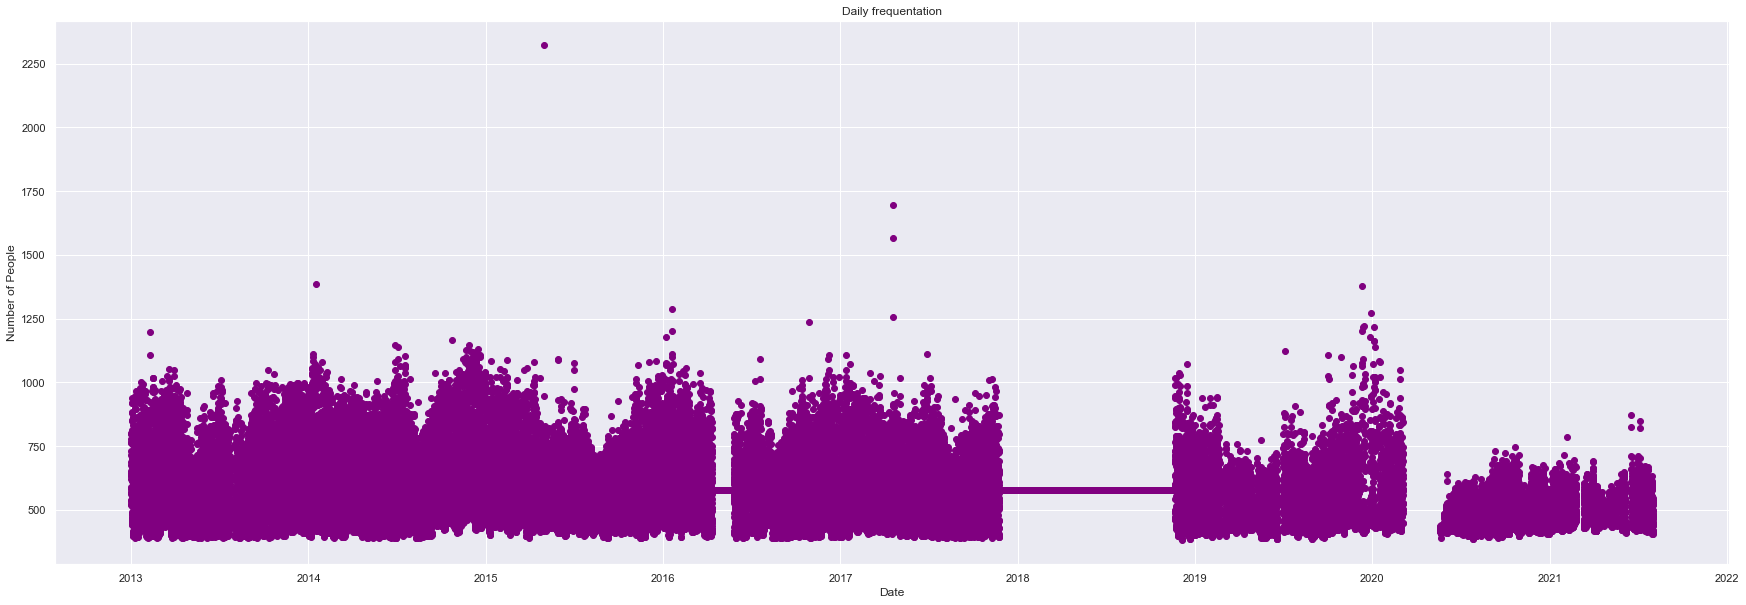

In [275]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(30, 10))

# Add x-axis and y-axis
ax.scatter(air_chatelet['DATE/HEURE'],
           air_chatelet['CO2'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Number of People",
       title="Daily frequentation")

plt.show()

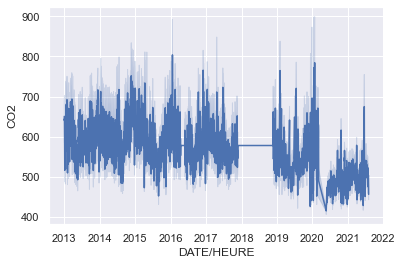

In [304]:
sns.lineplot(air_chatelet['DATE/HEURE'],air_chatelet['CO2'])
plt.show()

In [309]:
air_chatelet.describe(include='all')

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI
count,68842,68842.000000,68842.000000,68842.000000,68842.000000,68842.000000,68842.000000
unique,2948,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-08-15 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,NaN,NaN,NaN,NaN,NaN,NaN
first,2013-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-08-02 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,24.824238,35.362212,128.442081,578.034614,21.507925,44.689492
std,NaN,29.635161,13.293417,84.887621,119.968124,3.443869,8.412318
min,NaN,2.000000,4.000000,5.000000,383.000000,9.300000,20.200000
25%,NaN,8.000000,27.000000,80.000000,487.000000,19.400000,39.500000


In [276]:
processed_dataset = preprocess(air_chatelet)
X_train, X_test, Y_train, Y_test = train_test_split(*processed_dataset, test_size=0.3, shuffle=True)

In [ ]:
cv = grid_tuning(xgb.XGBClassifier(),
            { 'max_depth': [2, 3, 4] , 'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [300] })
#optim_param = dict({'silent':1, 'objective':'binary:logistic', 'iter': 100 }, **cv.best_params_)
booster = xgb.XGBRegressor( **cv.best_params_)
booster.fit(X_train, Y_train)
models['Extreme Gradient Boosting'] = compute_metrics(booster)
del cv

In [277]:
shap.initjs()
model = xgb.XGBRegressor()
model.fit(X_train, Y_train)
booster = model.get_booster()
model2 = booster.save_raw()[4:]
booster.save_raw = lambda: model2
explainer = shap.TreeExplainer(booster)
shap_values = explainer.shap_values(X_test, approximate=True)
index = 500
shap.force_plot(explainer.expected_value, shap_values[index,:], X_test.iloc[index,:])

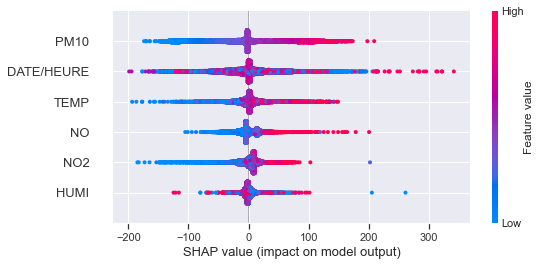

In [278]:
shap.summary_plot(shap_values, X_test)

## Air Franklin Roosvelt

In [279]:
air_frkl

,date/heure,NO,NO2,PM10,CO2,TEMP,HUMI
0,2021-07-26T02:00:00+02:00,4,24,ND,469,"24,8","56,1"
1,2021-07-26T01:00:00+02:00,3,21,ND,467,25,"54,6"
2,2021-07-26T00:00:00+02:00,2,17,ND,474,"25,3","53,4"
3,2021-07-25T23:00:00+02:00,3,18,ND,481,"25,5","52,6"
4,2021-07-25T22:00:00+02:00,4,18,ND,489,"25,6",54
...,...,...,...,...,...,...,...
74849,2013-01-01T06:00:00+01:00,27,57,15,464,15,"63,3"
74850,2013-01-01T05:00:00+01:00,27,56,22,481,"14,9","63,7"
74851,2013-01-01T04:00:00+01:00,22,52,45,490,"14,9","63,3"
74852,2013-01-01T03:00:00+01:00,43,61,18,536,"14,9",65


In [280]:
air_frkl.isna().sum()

date/heure       0
NO            5179
NO2           4639
PM10          2923
CO2           4785
TEMP          1902
HUMI          1909
dtype: int64

In [281]:
air_frkl = air_frkl.apply(lambda x: x.str.replace(',','.'))

In [282]:
dict1={}

for i in air_frkl:
    a=0
    for j in air_frkl[i]:
        if j == 'ND':
            a=a+1
    dict1[i]=a
    
dict1
            

{'date/heure': 0,
 'NO': 3358,
 'NO2': 2671,
 'PM10': 1069,
 'CO2': 2566,
 'TEMP': 22,
 'HUMI': 22}

In [283]:
dict1={}

for i in air_frkl:
    a=0
    for j in air_frkl[i]:
        if j == '<2':
            a=a+1
    dict1[i]=a
    
dict1
            

{'date/heure': 0,
 'NO': 970,
 'NO2': 0,
 'PM10': 0,
 'CO2': 0,
 'TEMP': 0,
 'HUMI': 0}

In [284]:
dict1={}

for i in air_frkl:
    a=0
    for j in air_frkl[i]:
        if j == '<5':
            a=a+1
    dict1[i]=a
    
dict1
            

{'date/heure': 0,
 'NO': 0,
 'NO2': 0,
 'PM10': 199,
 'CO2': 0,
 'TEMP': 0,
 'HUMI': 0}

In [285]:
dict1={}

for i in air_frkl:
    a=0
    for j in air_frkl[i]:
        if j == '>1000':
            a=a+1
    dict1[i]=a
    
dict1
            

{'date/heure': 0, 'NO': 0, 'NO2': 0, 'PM10': 1, 'CO2': 0, 'TEMP': 0, 'HUMI': 0}

In [286]:
air_frkl=air_frkl.drop(air_frkl[air_frkl['NO'] == 'ND'].index)
air_frkl=air_frkl.drop(air_frkl[air_frkl['NO2'] == 'ND'].index)
air_frkl=air_frkl.drop(air_frkl[air_frkl['PM10'] == 'ND'].index)
air_frkl=air_frkl.drop(air_frkl[air_frkl['CO2'] == 'ND'].index)
air_frkl=air_frkl.drop(air_frkl[air_frkl['TEMP'] == 'ND'].index)
air_frkl=air_frkl.drop(air_frkl[air_frkl['HUMI'] == 'ND'].index)

air_frkl['NO'].mask(air_frkl['NO'] == '<2', 2 , inplace=True)
air_frkl['PM10'].mask(air_frkl['PM10'] == '<5', 5 , inplace=True)
air_frkl['PM10'].mask(air_frkl['PM10'] == '>1000', 1000 , inplace=True)

In [287]:
air_frkl['NO']=pd.to_numeric(air_frkl['NO'])
air_frkl['NO2']=pd.to_numeric(air_frkl['NO2'])
air_frkl['PM10']=pd.to_numeric(air_frkl['PM10'])
#air_frkl['PM2.5']=pd.to_numeric(air_frkl['PM2.5'])
air_frkl['CO2']=pd.to_numeric(air_frkl['CO2'])
air_frkl['TEMP']=pd.to_numeric(air_frkl['TEMP'])
air_frkl['HUMI']=pd.to_numeric(air_frkl['HUMI'])

In [288]:
dscrb_frkl=air_frkl.describe(include='all')
dscrb_frkl

,date/heure,NO,NO2,PM10,CO2,TEMP,HUMI
count,69592,64413.000000,64953.000000,66669.000000,64854.000000,67718.000000,67710.000000
unique,69592,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-01-15T17:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,36.034931,54.275584,46.895604,485.221467,19.286389,47.892695
std,NaN,42.838434,22.677930,43.102611,58.382153,4.922069,10.187861
min,NaN,1.000000,4.000000,5.000000,382.000000,3.800000,16.000000
25%,NaN,9.000000,38.000000,23.000000,443.000000,15.600000,40.800000
50%,NaN,22.000000,53.000000,36.000000,476.000000,18.900000,47.600000
75%,NaN,47.000000,68.000000,54.000000,515.000000,23.100000,54.800000


In [290]:
values_frkl={'NO':dscrb_frkl['NO']['mean'],
                'NO2':dscrb_frkl['NO2']['mean'],
                'PM10':dscrb_frkl['PM10']['mean'],
                'CO2':dscrb_frkl['CO2']['mean'],
                'TEMP':dscrb_frkl['TEMP']['mean'],
                'HUMI':dscrb_frkl['HUMI']['mean']}

In [291]:
air_frkl = air_frkl.fillna(value=values_frkl)

In [292]:
air_frkl.isna().sum()

date/heure    0
NO            0
NO2           0
PM10          0
CO2           0
TEMP          0
HUMI          0
dtype: int64

In [67]:
air_frkl.to_csv('airfranklinclean.csv')

In [293]:
air_frkl['date/heure']=air_frkl['date/heure'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S+%I:00'))

In [294]:
air_frkl

,date/heure,NO,NO2,PM10,CO2,TEMP,HUMI
85,2021-07-22 02:00:00,7.0,42.0,118.0,502.0,26.6,41.0
86,2021-07-22 02:00:00,8.0,50.0,158.0,570.0,26.3,43.5
87,2021-07-22 02:00:00,10.0,56.0,138.0,541.0,25.8,45.8
88,2021-07-22 02:00:00,7.0,46.0,79.0,491.0,25.6,46.4
89,2021-07-22 02:00:00,6.0,36.0,41.0,457.0,25.6,46.0
...,...,...,...,...,...,...,...
74849,2013-01-01 01:00:00,27.0,57.0,15.0,464.0,15.0,63.3
74850,2013-01-01 01:00:00,27.0,56.0,22.0,481.0,14.9,63.7
74851,2013-01-01 01:00:00,22.0,52.0,45.0,490.0,14.9,63.3
74852,2013-01-01 01:00:00,43.0,61.0,18.0,536.0,14.9,65.0


In [310]:
air_frkl.describe(include='all')

,date/heure,NO,NO2,PM10,CO2,TEMP,HUMI
count,69592,69592.000000,69592.000000,69592.000000,69592.000000,69592.000000,69592.000000
unique,2978,NaN,NaN,NaN,NaN,NaN,NaN
top,2019-01-26 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,NaN,NaN,NaN,NaN,NaN,NaN
first,2013-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-07-22 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,36.034931,54.275584,46.895604,485.221467,19.286389,47.892695
std,NaN,41.213590,21.909029,42.187691,56.359691,4.855345,10.049158
min,NaN,1.000000,4.000000,5.000000,382.000000,3.800000,16.000000
25%,NaN,9.000000,39.000000,24.000000,446.000000,15.700000,41.000000


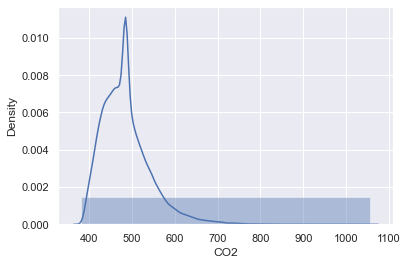

In [295]:
sns.distplot(air_frkl['CO2'],bins=1)
plt.show()

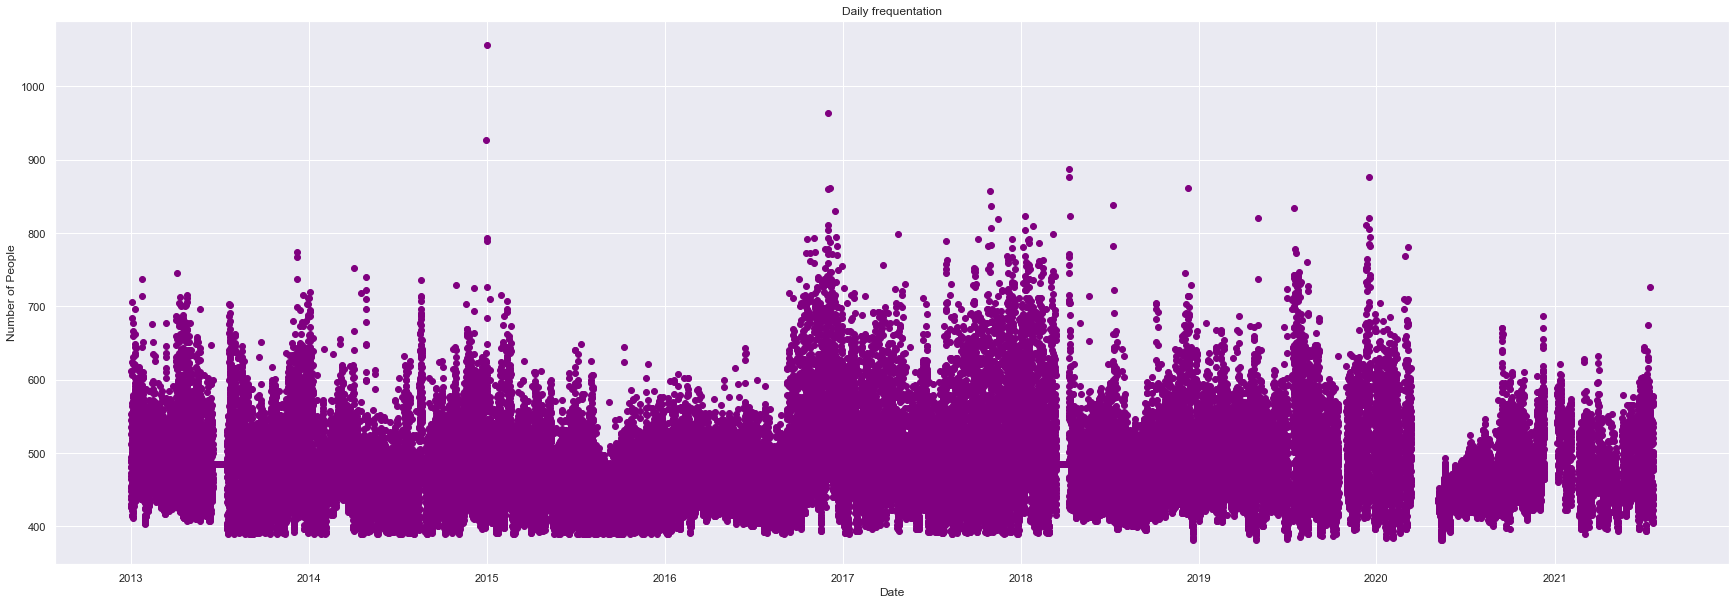

In [296]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#import earthpy as et

# Create figure and plot space
fig, ax = plt.subplots(figsize=(30, 10))

# Add x-axis and y-axis
ax.scatter(air_frkl['date/heure'],
           air_frkl['CO2'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Number of People",
       title="Daily frequentation")

plt.show()

In [297]:
val = ['date/heure', 'NO', 'NO2', 'PM10', 'TEMP', 'HUMI']

In [298]:
def preprocess(dataset):
    X = pd.DataFrame()

    X = dataset[val]
    
    Y = dataset['CO2']

    # Label encoding for categorical variables
    label_encoder = LabelEncoder()

    X['date/heure'] = label_encoder.fit_transform(dataset['date/heure'])


    return X, Y

In [299]:
processed_dataset = preprocess(air_frkl)
X_train, X_test, Y_train, Y_test = train_test_split(*processed_dataset, test_size=0.3, shuffle=True)

In [300]:
cv = grid_tuning(xgb.XGBClassifier(),
            { 'max_depth': [2, 3, 4] , 'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [300] })
#optim_param = dict({'silent':1, 'objective':'binary:logistic', 'iter': 100 }, **cv.best_params_)
booster = xgb.XGBRegressor( **cv.best_params_)
booster.fit(X_train, Y_train)
models['Extreme Gradient Boosting'] = compute_metrics(booster)
del cv

[22:47:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


KeyboardInterrupt: 

In [301]:
shap.initjs()
model = xgb.XGBRegressor()
model.fit(X_train, Y_train)
booster = model.get_booster()
model2 = booster.save_raw()[4:]
booster.save_raw = lambda: model2
explainer = shap.TreeExplainer(booster)
shap_values = explainer.shap_values(X_test, approximate=True)
index = 500
shap.force_plot(explainer.expected_value, shap_values[index,:], X_test.iloc[index,:])

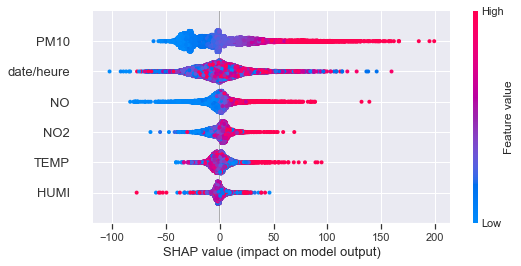

In [302]:
shap.summary_plot(shap_values, X_test)

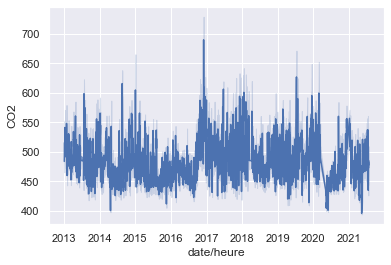

In [303]:
sns.lineplot(air_frkl['date/heure'],air_frkl['CO2'])
plt.show()